In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [12]:
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))


In [13]:
from utils import *

In [14]:
df = pd.read_csv('../data/raw/Copy of BrentOilPrices (1).csv')

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9488\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [16]:
df = df.set_index('Date')

## Events associated with the oil price changes

In [18]:
events = {
    "Russian Financial Crisis": "1999-08-17",
    "9/11 Terrorist Attacks": "2001-09-11",
    "U.S. Invasion of Iraq": "2003-03-20",
    "Hurricane Katrina": "2005-08-29",
    "Hurricane Rita": "2005-09-24",
    "Global Financial Crisis": "2008-09-15",
    "Deepwater Horizon Oil Spill": "2010-04-20",
    "Arab Spring": "2010-12-14",
    "Libyan Civil War": "2011-02-15",
    "Iran Sanctions": "2012-06-28",
    "U.S. Shale Oil Boom": "2014-06-30",
    "OPEC's Decision Not to Cut Production": "2014-11-27",
    "Saudi Oil Facility Attacks": "2019-09-14",
    "COVID-19 Pandemic Outbreak": "2020-03-11",
    "Post-COVID-19 Recovery + OPEC+ Cuts": "2021-09-22",
}


In [19]:
events_df = pd.DataFrame(list(events.items()), columns=['Event', 'Date'])
events_df['Date'] = pd.to_datetime(events_df['Date'])
print(events_df)

                                    Event       Date
0                Russian Financial Crisis 1999-08-17
1                  9/11 Terrorist Attacks 2001-09-11
2                   U.S. Invasion of Iraq 2003-03-20
3                       Hurricane Katrina 2005-08-29
4                          Hurricane Rita 2005-09-24
5                 Global Financial Crisis 2008-09-15
6             Deepwater Horizon Oil Spill 2010-04-20
7                             Arab Spring 2010-12-14
8                        Libyan Civil War 2011-02-15
9                          Iran Sanctions 2012-06-28
10                    U.S. Shale Oil Boom 2014-06-30
11  OPEC's Decision Not to Cut Production 2014-11-27
12             Saudi Oil Facility Attacks 2019-09-14
13             COVID-19 Pandemic Outbreak 2020-03-11
14    Post-COVID-19 Recovery + OPEC+ Cuts 2021-09-22


In [23]:
# Analyze price behavior around significant events
analysis_window = 60  # Days to analyze before and after each event

print("\nEvent Impact Analysis:")
print(event_impact_results_df)
event_impact_results = calculate_event_impacts(df, events_df, analysis_window)



Event Impact Analysis:
                                    Event       Date
0                Russian Financial Crisis 1999-08-17
1                  9/11 Terrorist Attacks 2001-09-11
2                   U.S. Invasion of Iraq 2003-03-20
3                       Hurricane Katrina 2005-08-29
4                          Hurricane Rita 2005-09-24
5                 Global Financial Crisis 2008-09-15
6             Deepwater Horizon Oil Spill 2010-04-20
7                             Arab Spring 2010-12-14
8                        Libyan Civil War 2011-02-15
9                          Iran Sanctions 2012-06-28
10                    U.S. Shale Oil Boom 2014-06-30
11  OPEC's Decision Not to Cut Production 2014-11-27
12             Saudi Oil Facility Attacks 2019-09-14
13             COVID-19 Pandemic Outbreak 2020-03-11
14    Post-COVID-19 Recovery + OPEC+ Cuts 2021-09-22


c:\brent-oil-statistical-modelling\scripts\utils.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window_data['Returns'] = event_window_data['Price'].pct_change()


NameError: name 'np' is not defined

## # Plot event impacts

In [24]:
events_df.head()

,Event,Date
0,Russian Financial Crisis,1999-08-17
1,9/11 Terrorist Attacks,2001-09-11
2,U.S. Invasion of Iraq,2003-03-20
3,Hurricane Katrina,2005-08-29
4,Hurricane Rita,2005-09-24


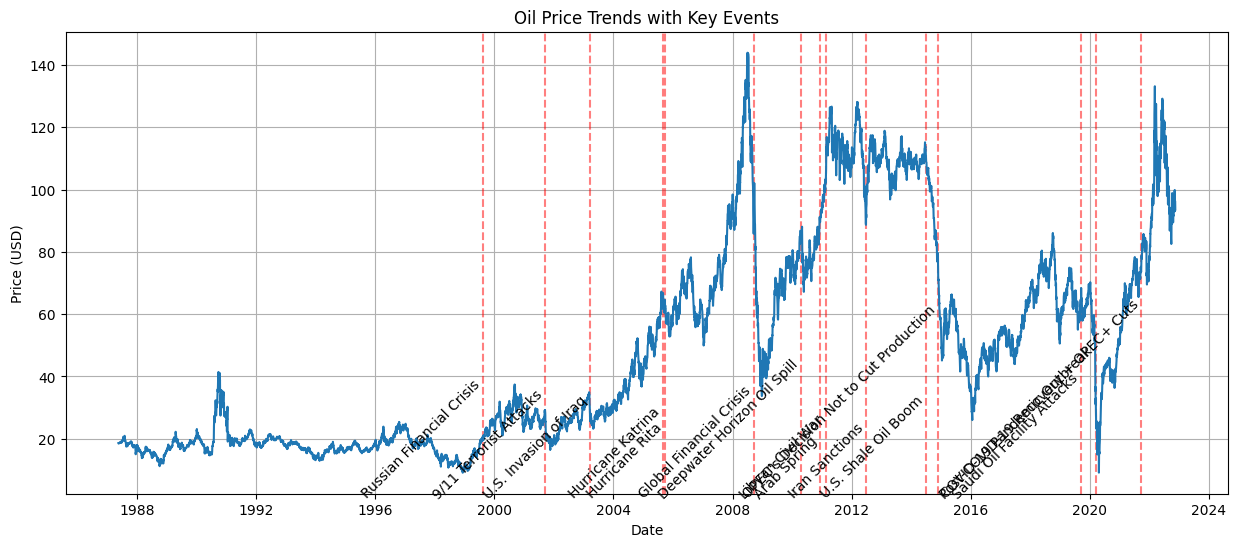

In [25]:

plt.figure(figsize=(15, 6))
for _, event in events_df.iterrows():
    plt.axvline(event['Date'], color='r', linestyle='--', alpha=0.5)
    plt.text(event['Date'], plt.ylim()[1], event['Event'], 
             rotation=45, ha='right')

plt.plot(df.index, df['Price'])
plt.title('Oil Price Trends with Key Events')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()